In [1]:
from google.colab import files
files.upload()

Saving Student_Performance.csv to Student_Performance.csv


{'Student_Performance.csv': b'Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index\n7,99,Yes,9,1,91.0\n4,82,No,4,2,65.0\n8,51,Yes,7,2,45.0\n5,52,Yes,5,2,36.0\n7,75,No,8,5,66.0\n3,78,No,9,6,61.0\n7,73,Yes,5,6,63.0\n8,45,Yes,4,6,42.0\n5,77,No,8,2,61.0\n4,89,No,4,0,69.0\n8,91,No,4,5,84.0\n8,79,No,6,2,73.0\n3,47,No,9,2,27.0\n6,47,No,4,2,33.0\n5,79,No,7,8,68.0\n2,72,No,4,3,43.0\n8,73,Yes,8,4,67.0\n6,83,Yes,7,2,70.0\n2,54,Yes,4,9,30.0\n5,75,No,7,0,63.0\n1,99,Yes,4,3,71.0\n6,96,No,9,0,85.0\n9,74,Yes,7,6,73.0\n1,85,No,5,6,57.0\n3,61,No,6,3,35.0\n7,62,Yes,7,4,49.0\n4,79,No,8,9,66.0\n9,84,Yes,6,6,83.0\n3,94,Yes,6,5,74.0\n5,90,Yes,4,3,74.0\n3,61,Yes,7,3,39.0\n7,44,Yes,9,1,36.0\n5,70,Yes,6,9,58.0\n9,52,Yes,8,1,47.0\n7,67,Yes,9,3,60.0\n2,97,Yes,9,4,74.0\n4,59,No,8,3,42.0\n9,72,No,8,2,68.0\n2,55,Yes,4,1,32.0\n9,68,No,5,3,64.0\n5,62,No,7,4,45.0\n2,63,Yes,6,0,39.0\n4,73,Yes,7,0,58.0\n7,46,No,9,5,36.0\n8,77,Yes,6,4,71.0\n3,76,Yes,4,3,54

# **Question 1**
**Apply multiple regression to another dataset of your own choice. Try for different train-
test split and random states.**

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv('/content/Student_Performance.csv')

In [5]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [8]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({'Yes':1, 'No':0})

<ipython-input-8-b22aa8963135>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({'Yes':1, 'No':0})


In [45]:
x = df.drop(['Performance Index'], axis=1)
y = df['Performance Index']

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=1)

In [47]:
model = LinearRegression()

In [48]:
model.fit(x_train,y_train)

LinearRegression()

In [49]:
y_pred = model.predict(x_test)

In [50]:
print(model.coef_)
print(model.intercept_)

[2.85406022 1.01826685 0.59659517 0.47551045 0.19146725]
-33.99877454524152


In [51]:
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2: {r2_score(y_test,y_pred)}")

MSE: 4.212998016862821
MAE: 1.6173174221523676
RMSE: 2.0525588948585183
R2: 0.9884110852416123


Text(0, 0.5, 'Error')

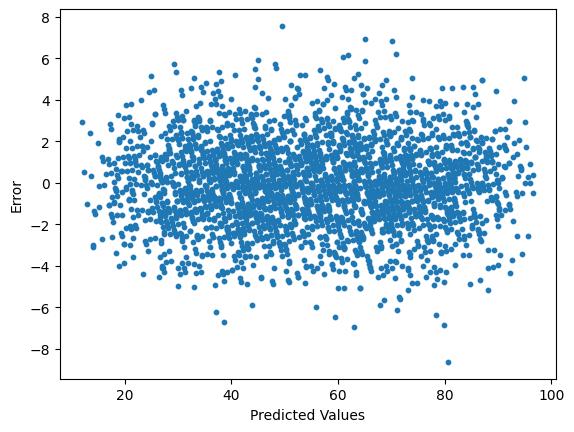

In [52]:
plt.scatter(y_pred,y_test-y_pred,s=10)
plt.xlabel('Predicted Values')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

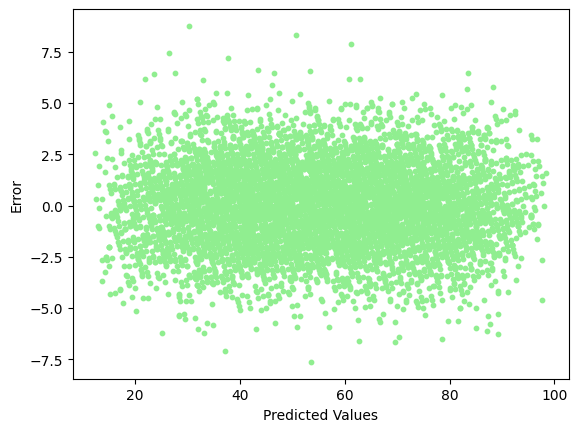

In [53]:
plt.scatter(model.predict(x_train),y_train-model.predict(x_train),c='lightgreen',s=10)
plt.xlabel('Predicted Values')
plt.ylabel('Error')

# **Question 2**
**For the given dataset (or for a dataset of your choice), run multiple regression on a subset
of predictors and observe the differences in your model’s performance.**

In [54]:
x = df.drop(['Performance Index','Sample Question Papers Practiced','Previous Scores'], axis=1)
y = df['Performance Index']

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=1)

In [56]:
model.fit(x_train,y_train)

LinearRegression()

In [57]:
y_pred = model.predict(x_test)

In [58]:
print(model.coef_)
print(model.intercept_)

[2.81537774 0.87761096 0.52497425]
37.16567248103006


In [59]:
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2: {r2_score(y_test,y_pred)}")

MSE: 314.41918493868684
MAE: 15.31359624464923
RMSE: 17.73186918908119
R2: 0.1351106461309194


Text(0, 0.5, 'Error')

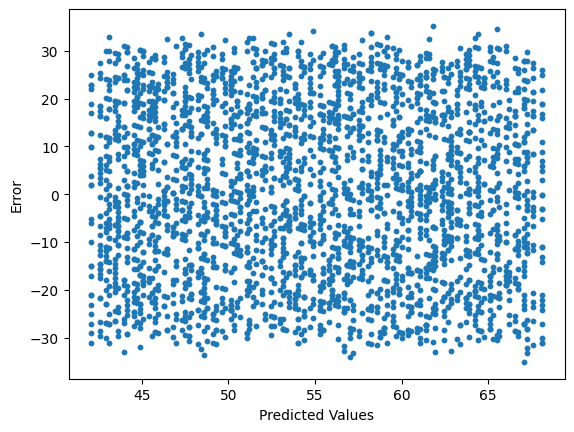

In [60]:
plt.scatter(y_pred,y_test-y_pred,s=10)
plt.xlabel('Predicted Values')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

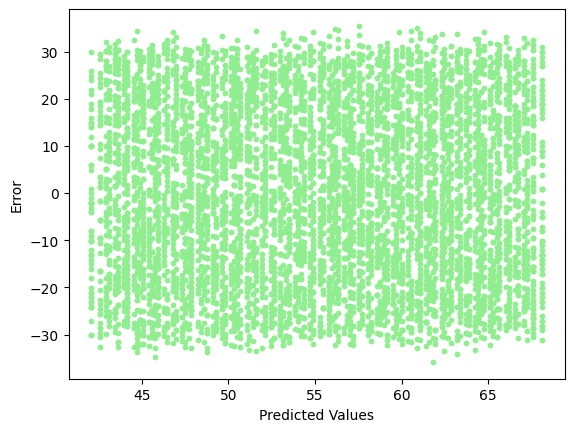

In [61]:
plt.scatter(model.predict(x_train),y_train-model.predict(x_train),c='lightgreen',s=10)
plt.xlabel('Predicted Values')
plt.ylabel('Error')

**Now, the above model is not working as good as Question 1's model. As we can see from the scatter plot the the datapoints are not around 0 any more. Therefore the model is working badly**

**# Question 3**
**Determine the performance metrics and generate a plot for polynomial regression by
selecting one predictor at a time from the given dataset. Set different values of degree of
polynomial to observe the variations.**

In [73]:
x = df[['Sleep Hours']]
y = df['Performance Index']

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=1)

In [94]:
degrees = [1,2,3,4]

R2 1: 0.003071962100699488
R2 2: 0.00293607310215227
R2 3: 0.002380929308288038
R2 4: 0.0024716412494327766


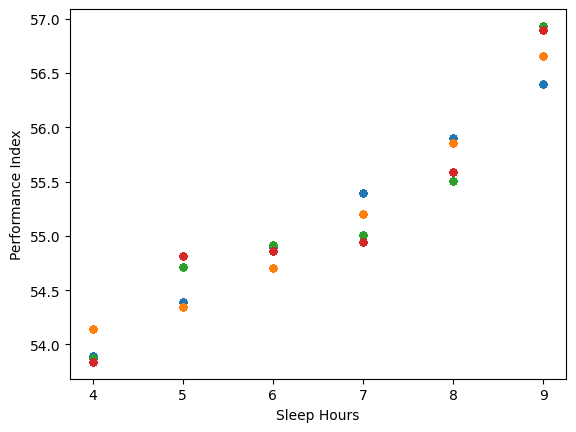

In [95]:
for idx,degree in enumerate(degrees):
  poly = PolynomialFeatures(degree = degree)
  x_train_poly = poly.fit_transform(x_train)
  x_test_poly = poly.transform(x_test)

  model.fit(x_train_poly,y_train)

  y_pred = model.predict(x_test_poly)

  print(f"R2 {idx+1}: {r2_score(y_test,y_pred)}")

  plt.scatter(x_test,y_pred,s=20)
  plt.xlabel('Sleep Hours')
  plt.ylabel('Performance Index')

# **Question 4**
**For a dataset of your choice, repeat the same process for polynomial regression.**

In [96]:
x = df.drop(['Performance Index'], axis=1)
y = df['Performance Index']

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=1)

In [98]:
poly = PolynomialFeatures(degree = 3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [99]:
model.fit(x_train_poly,y_train)

LinearRegression()

In [100]:
y_pred = model.predict(x_test_poly)

In [101]:
print(f"R2: {r2_score(y_test,y_pred)}")

R2: 0.988310099602484


Text(0, 0.5, 'actual')

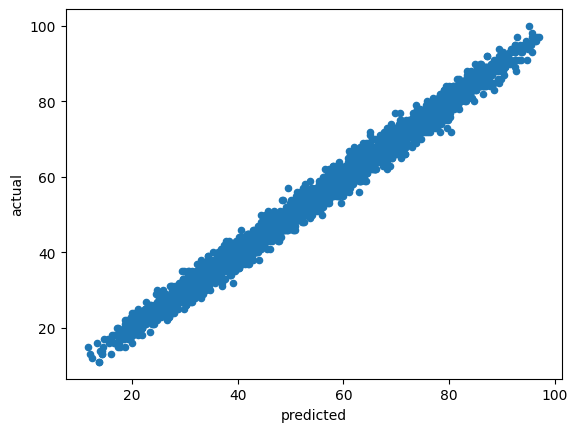

In [104]:
plt.scatter(y_pred,y_test,s=20)
plt.xlabel('predicted')
plt.ylabel('actual')

Text(0, 0.5, 'Error')

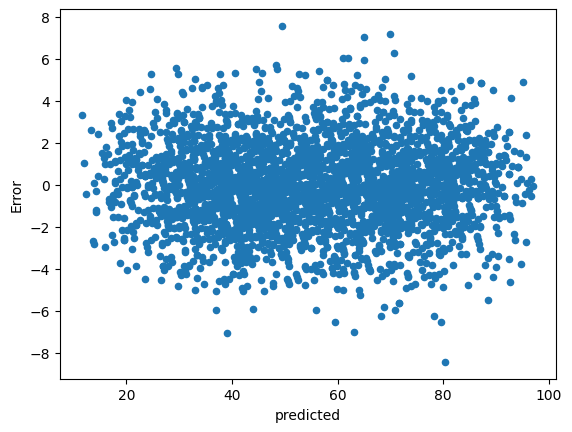

In [105]:
plt.scatter(y_pred,y_test-y_pred,s=20)
plt.xlabel('predicted')
plt.ylabel('Error')